# SETTINGS


In [1]:
import torch
import torchvision
from script import *
from visualization import *
from train_and_test import *
from app_3_test import *


In [2]:
BATCH_SIZE = 32
NUM_EPOCHS = 100

# Applying APP3 and creating Train, Validation and Test DataLoaders

len train:  479
len val:  119
len test:  75


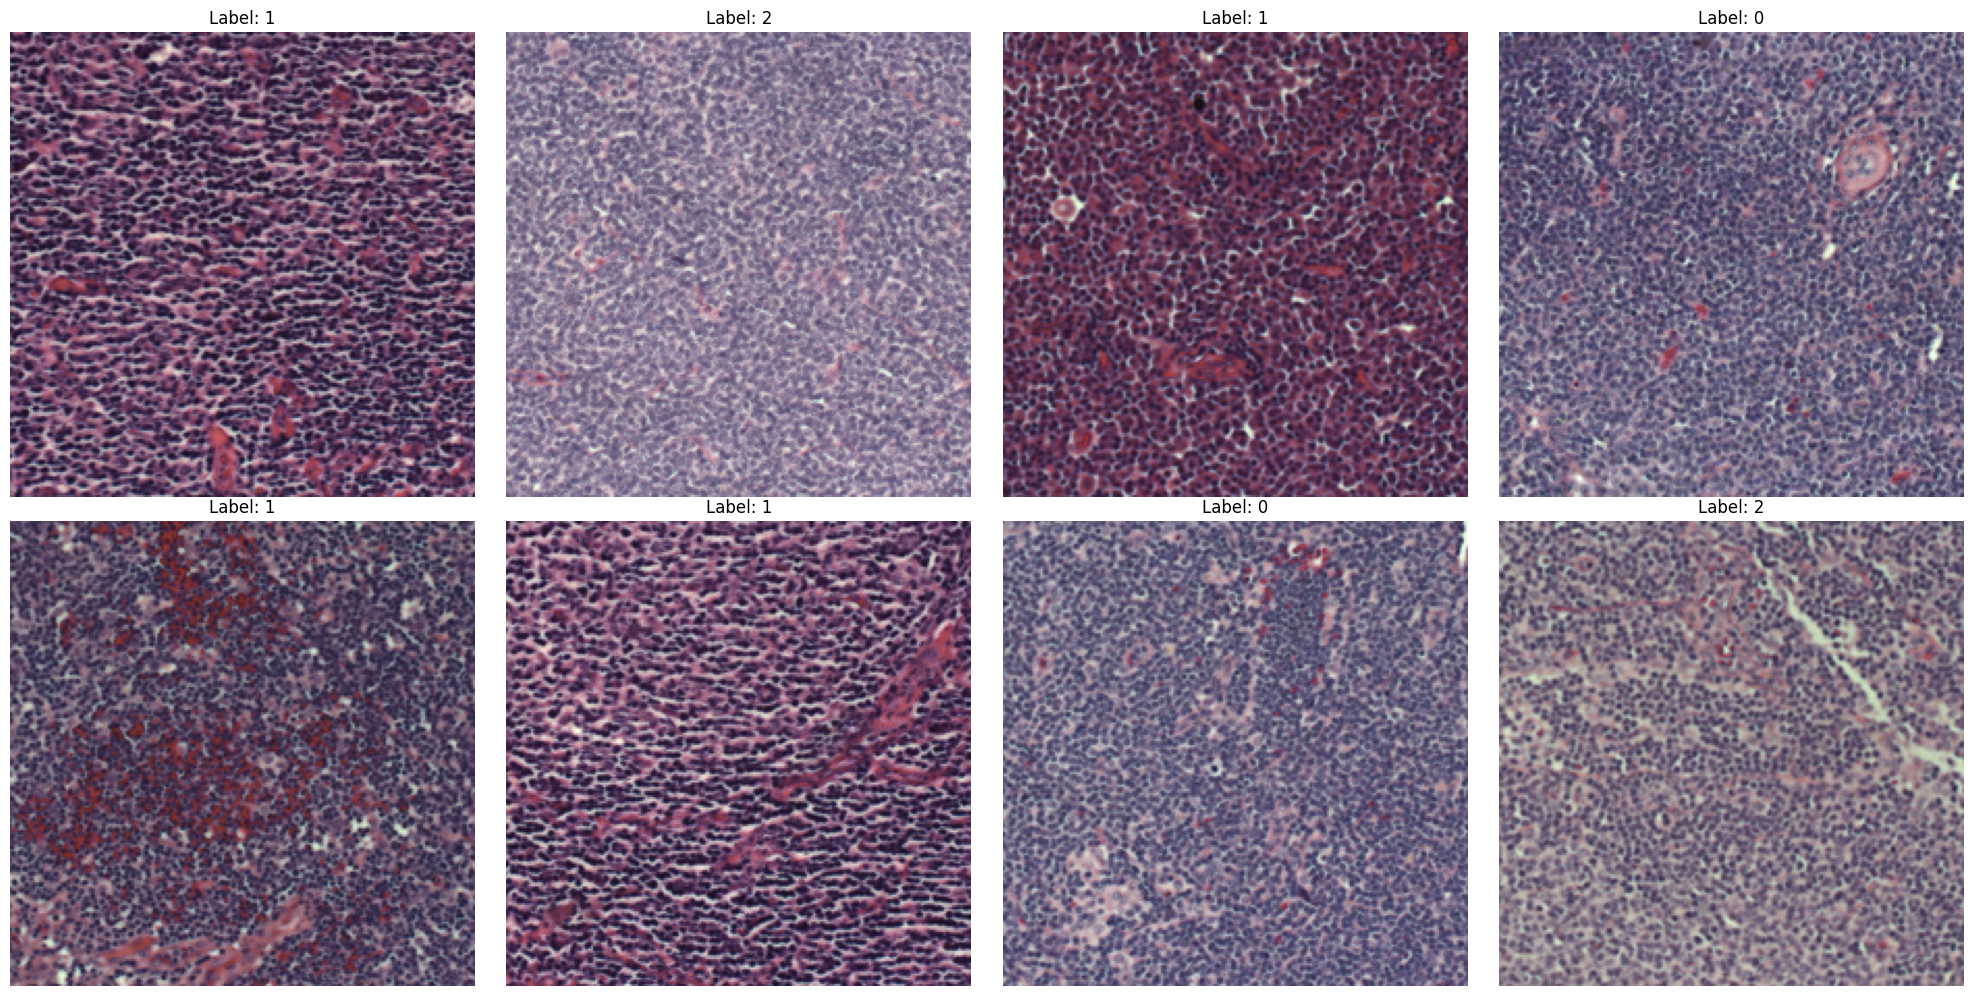

In [3]:

dm = MyDataModule(batch_size=BATCH_SIZE, transform=APP3.APP3, augment=True)
dm.setup()
train_loader = dm.train_dataloader()
test_loader = dm.test_dataloader()
val_loader = dm.val_dataloader()

app_sample_visualizer(train_loader)


# First Model: AlexNet

In [4]:
    Alexnet_model = torchvision.models.alexnet(weights='DEFAULT')
    Alexnet_model.classifier[4] = nn.Linear(4096,1024)

    Alexnet_model.classifier[6] = nn.Linear(1024,3)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 153MB/s]  


# Train and Validation Phase

In [5]:
    tt = Train_Test(NUM_EPOCHS, Alexnet_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/Alexnet_model_app3.pth')
    tt.setup(learning_rate=0.0001)
    train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 1.0633753248196802,--- Validation loss: 1.0258148773377682
Train Accuracy: 40.50%,--- Val Accuracy: 48.74%
--------------------------


Epoch [2/100] - Train loss: 0.8470479303461524,--- Validation loss: 0.9547828490994558
Train Accuracy: 58.25%,--- Val Accuracy: 55.46%
--------------------------


Epoch [3/100] - Train loss: 0.7487063132895309,--- Validation loss: 0.9142095937448389
Train Accuracy: 65.97%,--- Val Accuracy: 61.34%
--------------------------


Epoch [4/100] - Train loss: 0.7634284100602216,--- Validation loss: 0.822472434584834
Train Accuracy: 62.63%,--- Val Accuracy: 59.66%
--------------------------


Epoch [5/100] - Train loss: 0.6641502888068277,--- Validation loss: 0.6721697725167796
Train Accuracy: 69.94%,--- Val Accuracy: 69.75%
--------------------------


Epoch [6/100] - Train loss: 0.5481491390001301,--- Validation loss: 0.5184107903672868
Train Accuracy: 74.11%,--- Val Accuracy: 78.15%
--------------------------


Epoch [7/100] - T

# Plotting Result

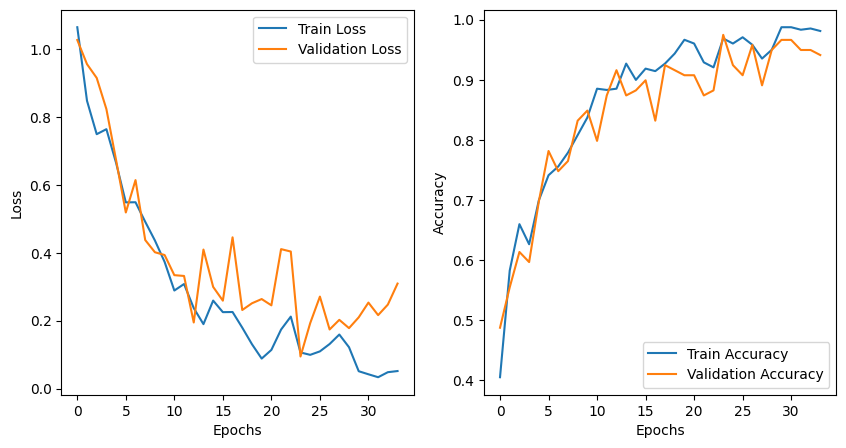

In [6]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [7]:
    tt.test()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.81      0.96      0.88        27
           2       0.93      0.68      0.79        19

    accuracy                           0.89        75
   macro avg       0.90      0.87      0.88        75
weighted avg       0.90      0.89      0.89        75

Accuracy of the network on the test images: 89.33 %


# Second Model ResNet-50

In [8]:
resnet50_model = torchvision.models.resnet50(weights='DEFAULT')
resnet50_model.fc = nn.Linear(2048,3)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s]


# Train and Validation Phase

In [9]:
tt = Train_Test(NUM_EPOCHS, resnet50_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/ResNet50_model_app3.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 1.029741829397285,--- Validation loss: 1.091296163927607
Train Accuracy: 53.03%,--- Val Accuracy: 41.18%
--------------------------


Epoch [2/100] - Train loss: 0.7827650358383242,--- Validation loss: 1.067991511160586
Train Accuracy: 75.16%,--- Val Accuracy: 42.02%
--------------------------


Epoch [3/100] - Train loss: 0.49836752801698037,--- Validation loss: 0.5670960044660488
Train Accuracy: 86.43%,--- Val Accuracy: 77.31%
--------------------------


Epoch [4/100] - Train loss: 0.28837681429495643,--- Validation loss: 0.15492750422543838
Train Accuracy: 92.28%,--- Val Accuracy: 94.12%
--------------------------


Epoch [5/100] - Train loss: 0.1530261889940015,--- Validation loss: 0.07913646114473584
Train Accuracy: 96.87%,--- Val Accuracy: 98.32%
--------------------------


Epoch [6/100] - Train loss: 0.1216061232389886,--- Validation loss: 0.03632901641814148
Train Accuracy: 96.24%,--- Val Accuracy: 100.00%
--------------------------


Epoch [7/100]

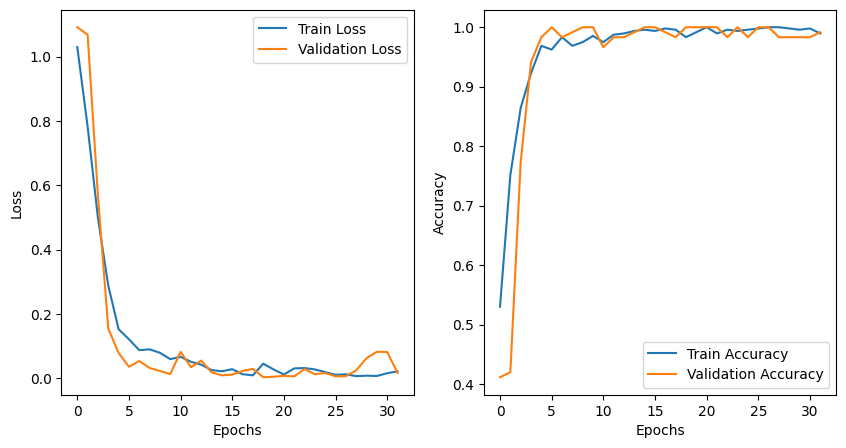

In [10]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [11]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.96      0.98        27
           2       0.95      1.00      0.97        19

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

Accuracy of the network on the test images: 98.67 %


# Third Model: DenseNet-121

In [12]:
densenet121_model = torchvision.models.densenet121(weights='DEFAULT')
densenet121_model.classifier = nn.Linear(1024, 3)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 142MB/s] 


# Train and Validation Phase

In [13]:
tt = Train_Test(NUM_EPOCHS, densenet121_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/DenseNet121_model_app3.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.8467633301131661,--- Validation loss: 1.1697161979034167
Train Accuracy: 60.33%,--- Val Accuracy: 31.09%
--------------------------


Epoch [2/100] - Train loss: 0.4209285478004583,--- Validation loss: 0.7460972080711558
Train Accuracy: 87.68%,--- Val Accuracy: 62.18%
--------------------------


Epoch [3/100] - Train loss: 0.2436636540113262,--- Validation loss: 0.28404771304931964
Train Accuracy: 94.78%,--- Val Accuracy: 88.24%
--------------------------


Epoch [4/100] - Train loss: 0.14398335206608184,--- Validation loss: 0.13425857717750453
Train Accuracy: 96.66%,--- Val Accuracy: 98.32%
--------------------------


Epoch [5/100] - Train loss: 0.09737527174466835,--- Validation loss: 0.08651894747334368
Train Accuracy: 97.91%,--- Val Accuracy: 96.64%
--------------------------


Epoch [6/100] - Train loss: 0.06551415738426071,--- Validation loss: 0.13128523437791512
Train Accuracy: 98.96%,--- Val Accuracy: 96.64%
--------------------------


Epoch [7/

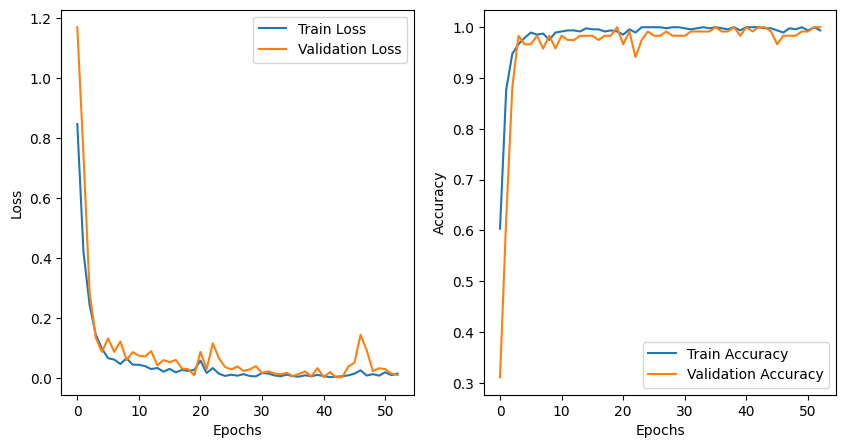

In [14]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [15]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      0.96      0.96        27
           2       0.95      0.95      0.95        19

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

Accuracy of the network on the test images: 97.33 %
